In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


database_service = "sqlite"
database = "jupiter.db"
connectable = f"{database_service}:///{database}"

query="SELECT distance_km FROM moons"

pd.read_sql(query, connectable)

,distance_km
0,129000.0
1,23231000.0
2,181400.0
3,21300000.0
4,24000000.0
5,22931000.0
6,23039000.0
7,24583090.0
8,1882700.0
9,22579850.0


In [46]:

import sqlite3

connection = sqlite3.connect('jupiter.db')

cursor = connection.cursor()

columns_query = "PRAGMA table_info(moons);"
cursor.execute(columns_query)
columns = cursor.fetchall()

# Print column names
print("Column names for the 'moons' table:")
for column in columns:
    print(column[1])

# Close the cursor and connection
cursor.close()
connection.close()


Column names for the 'moons' table:
moon
period_days
distance_km
radius_km
mag
mass_kg
group
ecc
inclination_deg


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

class Moons:
    def __init__(self, db):
    
        database_service = "sqlite"
        self.connectable = f"{database_service}:///{db}"
        self.load_data()
        
    def load_data(self):
       
        query = "SELECT * FROM moons"
        self.data = pd.read_sql(query, self.connectable)
        
    def stats(self):
        
        return self.data.describe()
    
    def correlations(self):
        
        return self.data.corr()

    def plot_distance_vs_period(self):
        
        plt.scatter(self.data['distance_km'], self.data['period_days'])
        plt.xlabel('Distance from Jupiter (km)')
        plt.ylabel('Orbital Period (days)')
        plt.title('Distance vs. Orbital Period for Jupiter\'s Moons')
        plt.show()
    
    def extract_moon_data(self, moon_name):
        # Extract data for a specific moon
        moon_data = self.data[self.data['moon'] == moon_name]
        return moon_data

Correlation Statistics:


C:\Users\nickh\AppData\Local\Temp\ipykernel_50700\1247124405.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return self.data.corr()


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000000,0.991521,-0.534434,0.742646,-0.504430,0.737181,0.969493
distance_km,0.991521,1.000000,-0.567266,0.799187,-0.453339,0.750819,0.953873
radius_km,-0.534434,-0.567266,1.000000,-0.887393,0.968379,-0.478901,-0.487645
mag,0.742646,0.799187,-0.887393,1.000000,-0.861359,0.554617,0.688529
mass_kg,-0.504430,-0.453339,0.968379,-0.861359,1.000000,-0.543138,-0.489378
ecc,0.737181,0.750819,-0.478901,0.554617,-0.543138,1.000000,0.645961
inclination_deg,0.969493,0.953873,-0.487645,0.688529,-0.489378,0.645961,1.000000


Summary Statistics:


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000000,5.600000e+01,56.000000,53.000000,6.000000e+00,56.000000,56.000000
mean,525.998146,1.775655e+07,158.969643,20.418302,6.551798e+22,0.222922,113.571607
std,272.670243,8.253688e+06,557.730632,4.926587,6.010469e+22,0.126899,64.562822
min,0.290000,1.280000e+05,1.000000,4.610000,2.080000e+18,0.000200,0.030000
25%,258.750000,1.170252e+07,1.500000,20.800000,1.200276e+22,0.159201,30.582500
50%,632.500000,2.129009e+07,2.000000,22.500000,6.865891e+22,0.228000,148.600000
75%,725.500000,2.336375e+07,11.562500,23.000000,1.030252e+23,0.298858,159.175000
max,787.000000,2.458309e+07,2634.100000,23.700000,1.481900e+23,0.611016,166.200000


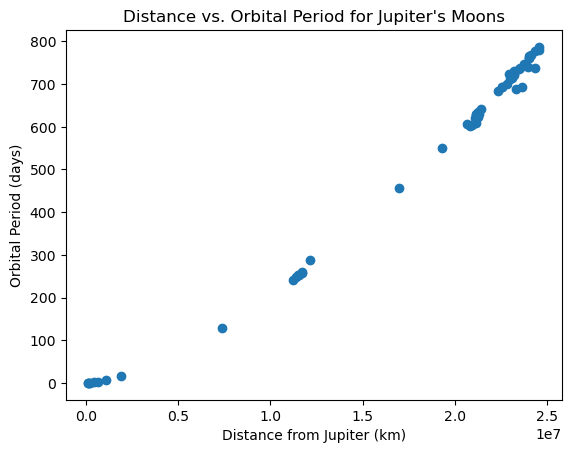

Data for Io:
    moon  period_days  distance_km  radius_km   mag       mass_kg     group  \
31   Io         1.75     421700.0     1821.6  5.02  8.931938e+22  Galilean   

       ecc  inclination_deg  
31  0.0041              2.2  


In [63]:



# Create an instance of the Moons class
jupiter_moons = Moons('jupiter.db')

correlations = jupiter_moons.correlations()
print("Correlation Statistics:")
display(correlations)

# Perform exploratory analysis
summary_stats = jupiter_moons.stats()
print("Summary Statistics:")
display(summary_stats)

# Plot distance vs. orbital period
jupiter_moons.plot_distance_vs_period()

# Extract data for a specific moon (replace 'Io' with the desired moon name)
io_data = jupiter_moons.extract_moon_data('Io')
print("Data for Io:\n", io_data)
